# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 24 марта 18:00 Сдача **очная** на занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha*\frac{\partial L}{\partial w}(w_{old})  $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$\frac{\partial L}{\partial w}(w_{old}) = -\frac{2}{N}\sum_i(y_i - x_i*w_{old})*x_i + \frac{2}{C}\cdot{w_{old}}$$

$$ w_{new} = w_{old}(1-\frac{2*\alpha}{C}) - \alpha*\frac{2}{N}\sum_i(x_i*w_{old} - y_i)*x_i  $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$\frac{\partial L}{\partial w}(w_{old}) = -\frac{1}{N}*(\frac{y_i*\sigma*(1-\sigma)*x_i}{\sigma} - \frac{(1-y_i)*\sigma*(1-\sigma)*x_i}{1-\sigma})$$

$$\frac{\partial L}{\partial w}(w_{old})=-\frac{1}{N} x_i\cdot({y_i - \sigma(x_i,w_{old})})+ \frac{2}{C}*{w_{old}}$$

$$ w_{new} = w_{old}(1-\frac{2*\alpha}{C}) - \alpha*\frac{1}{N}\sum_i(x_i*(\sigma - y_i))$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$ \frac{\partial^2 L}{\partial w_i\partial w_j} = \frac{2}{N}\sum_{i=1,j=1}^n x_i\cdot{x_j}=(X^{T}X) >= 0$$

Последнее произведение матриц дает положительно определенную матрицу (теорема из курса алгебры)

$$ (X^{T}X + \lambda I)^{-1} X^{T}y $$

С помощью диагональной матрицы мы добиваемся того, что у нас начинает существовать обратная матрица, а именно сводим ее к регулярной

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac{\partial E(L | x_i)}{\partial a} = -p(y_i = 1 |x_i ) \frac{1}{a(x_i)}   - p(y_i = 0 | x_i) \frac{1}{1 - a(x_i)} = -p(y_i = 1 |x_i ) \frac{1}{a(x_i)} + \frac{1}{1 - a(x_i)} - p(y_i = 1 |x_i ) \frac{1}{1 - a(x_i)} = \frac{1}{1 - a(x_i)} - p(y_i = 1 |x_i ) \frac{1}{(1 - a(x_i))a(x_i)} = 0 \Rightarrow a(x_i) = p(y_i = 1 |x_i ) $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Не нужно, так как его штрафовать не имеет смысла и он может быть большим, а во-вторых мы еще и модель должны будем штрафовать еще больше

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    indexes = np.arange(y.shape[0])
    if(shuffle):
        np.random.shuffle(indexes)
    
    for i in range(0, y.shape[0], batch_size):
        X_batch = X[indexes[i:i + batch_size]]
        y_batch = y[indexes[i:i + batch_size]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [7]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value = 1/(1+np.exp(-x))

    return sigm_value

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg',batch_size=10,threshold = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.threshold = threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        regular = np.sum(self.weights ** 2)/ self.C
        
        if(self.model_type == 'lin_reg'):
            
            loss = ((y_batch - np.dot(X_batch, self.weights)) ** 2)/X_batch.shape[0]
            
        if(self.model_type == 'log_reg'):
            
            sig = sigmoid(np.dot(X_batch, self.weights))
            loss = (-1) * (y_batch * np.log(sig) + (1-y_batch) * np.log(1-sig))/X_batch.shape[0]
            
        return loss + regular
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N=X_batch.shape[0]
        
        grad_regular = 2*self.weights/self.C
        if(self.model_type == 'lin_reg'):
            loss_grad = np.dot(np.dot(X_batch, self.weights) - y_batch, X_batch)*2/N + grad_regular 
        if(self.model_type == 'log_reg'):
            sig = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = np.dot(sig - y_batch, X_batch)/N + grad_regular
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.random.uniform(0,2,X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)          
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)     
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if(self.model_type == 'lin_reg'):
            y_hat = np.dot(X, self.weights)
        if(self.model_type == 'log_reg'):
            prep = sigmoid(np.dot(X, self.weights))
            y_hat=np.array(list(map(int, prep > self.threshold)))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    x = np.linspace(-5,8)
    plt.plot(x,-x * clf.weights[0] / clf.weights[1])
    plt.xlim(-4,4)
    plt.ylim(-5,5)

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)  #нормализовал данные
X = (X - mean) / std

Линейная регрессия
[ 0.17464872 -0.06967722]


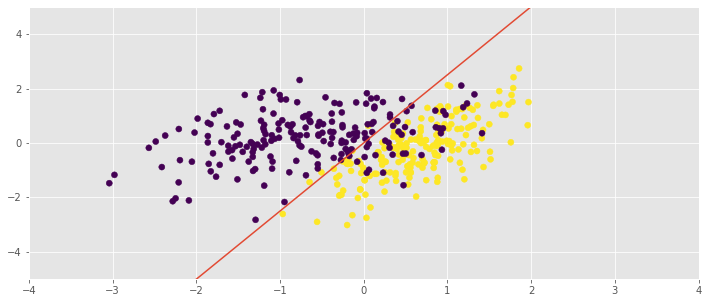

In [10]:
clf = MySGDClassifier(batch_generator)
clf.fit(X,y)

print('Линейная регрессия')
plot_decision_boundary(clf)
print(clf.weights)
plt.scatter(X[:,0], X[:,1], c=y)

Логистическая регрессия
[ 0.14650862 -0.05232624]


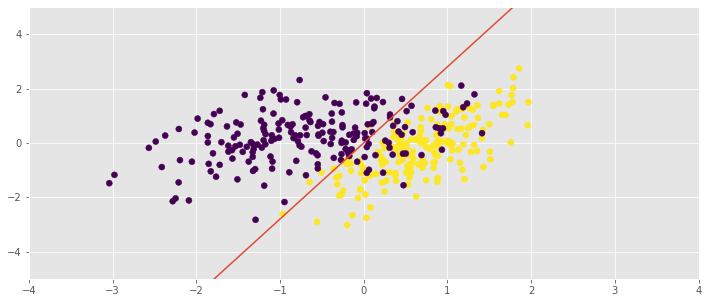

In [11]:
clf = MySGDClassifier(batch_generator, model_type = 'log_reg')
clf.fit(X, y)

print('Логистическая регрессия')
print(clf.weights)
plot_decision_boundary(clf)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [14]:
N = 100
def plot_alpha(model = 'lin_reg'):
    alpha = [0.0005, 0.001, 0.01, 0.05]
    for i in alpha:
        clf = MySGDClassifier(batch_generator, max_epoch=100, model_type=model, batch_size=100, alpha=i)
        clf.fit(X, y)
        loss = np.asarray(clf.errors_log['loss'])
        x = [loss[i:i+N,:].mean() for i in range(loss.shape[0] // N)]
        plt.plot(x, label = 'alpha={}'.format(i))
    plt.legend()

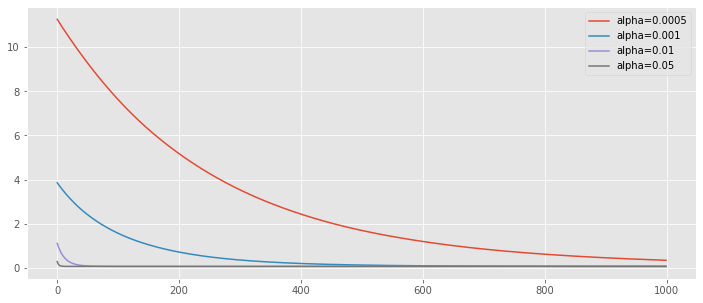

In [15]:
plot_alpha('lin_reg')

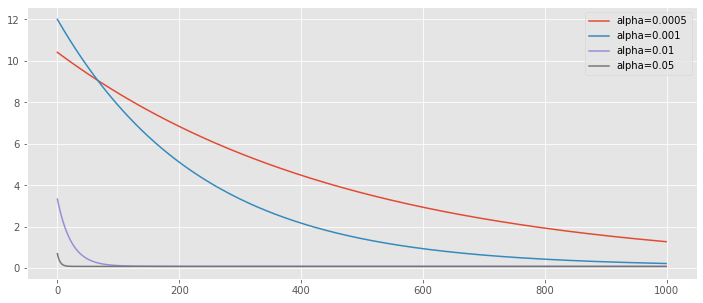

In [16]:
plot_alpha('log_reg')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Чем больше альфа, тем быстрее сходится, но лучше брать что-то среднее, чтобы не перепрыгнуть нужный порог. Будем сходиться медленно, но верно.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [19]:
def vis_C(model = 'lin_reg'):
    w_mean=[]
    const = np.logspace(3, -3, 10)
    for c in const:
        clf = MySGDClassifier(batch_generator,C=c, max_epoch=10, model_type=model,batch_size=200, alpha=0.01)
        clf.fit(X, y)
        w_mean.append(clf.weights.mean())
    plt.plot(const, w_mean)

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in true_divide
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in add


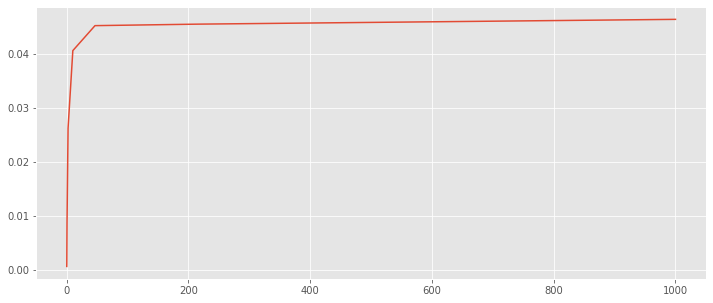

In [20]:
vis_C('lin_reg')

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/py

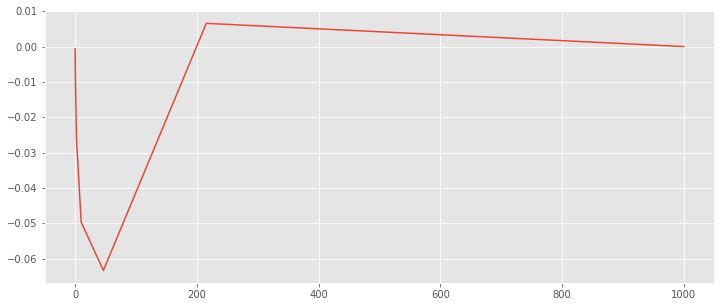

In [21]:
vis_C('log_reg')

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

при уменьшении С веса будут уменьшаться сильнее. Это мы и видим тут (странный скачок на логарифме)

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [22]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [23]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [24]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [25]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [32]:
import time
batch_size = [50, 100, 500, 1000]

for bs in batch_size:
    clf = MySGDClassifier(batch_generator, C=0.001, batch_size=bs, 
                          model_type='log_reg', max_epoch=100, alpha=0.01)
    start = time.time()
    clf.fit(X_train,y_train)
    end = time.time()
    time_dif = end - start
    print(bs , time_dif)

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in true_divide


50 1.6186180114746094


/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100 0.858098030090332
500 0.5173728466033936
1000 0.27952003479003906


Возьмем batch_size = 100

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [28]:
#from sklearn.model_selection import KFold

In [29]:
# def cross_val_score(clf, X, y, c, mod_t, m_epoch, al):
#     kf = KFold(n_splits=3)
#     res = []
#     clf = MySGDClassifier(batch_generator, C=c, batch_size=100, 
#                           model_type=mod_t, max_epoch=m_epoch, alpha=al)
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         clf.fit(X_train, y_train)
#         clf_pred = clf.predict(X_test)
#         res.append(f1_score(y_test, clf_pred, average='micro'))
#     score = np.mean(res)
#     return score

In [33]:
C_val = np.logspace(3, -3, 10)[-5:]
alpha_val = [0.1, 0.01, 0.001]
max_epoch_val = [10, 50, 100, 200]
model_type_val = ['log_reg', 'lin_reg']
results = []
X_tr_cv, X_te_cv = X_train[:10000], X_train[10000:]
y_tr_cv, y_te_cv = y_train[:10000], y_train[10000:]
for c in C_val:
    for al in alpha_val:
        for m_epoch in max_epoch_val:
            for mod_t in model_type_val:
                clf = MySGDClassifier(batch_generator, C=c, batch_size=100, 
                                      model_type=mod_t, max_epoch=m_epoch, alpha=al)
                clf.fit(X_tr_cv, y_tr_cv)
                y_pr = clf.predict(X_te_cv)
                try:
                    score = roc_auc_score(y_te_cv, y_pr, average='micro')
                except:
                    score = 0
                results.append([score, c, al, m_epoch, mod_t])

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in true_divide
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWa

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in greater
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeW

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in true_divide
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in greater
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarn

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in greater
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in true_divide
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWa

In [34]:
sorted(results, key= lambda i: i[0],reverse=True)

[[0.842608108737141, 0.1, 0.01, 100, 'lin_reg'],
 [0.8425964716287296, 0.1, 0.01, 50, 'lin_reg'],
 [0.8425062840385421, 0.021544346900318867, 0.001, 50, 'lin_reg'],
 [0.8424844644602708, 0.4641588833612782, 0.001, 200, 'lin_reg'],
 [0.8424728273518597, 0.4641588833612782, 0.001, 50, 'lin_reg'],
 [0.8424633722012753, 0.4641588833612782, 0.001, 100, 'lin_reg'],
 [0.8424611902434483, 0.4641588833612782, 0.01, 200, 'lin_reg'],
 [0.8424582809663455, 0.1, 0.001, 50, 'lin_reg'],
 [0.8424408253037285, 0.021544346900318867, 0.01, 200, 'lin_reg'],
 [0.8424335521109715, 0.004641588833612782, 0.001, 10, 'lin_reg'],
 [0.8424262789182145, 0.1, 0.001, 10, 'lin_reg'],
 [0.8424219150025601, 0.4641588833612782, 0.01, 100, 'lin_reg'],
 [0.8424160964483546, 0.1, 0.001, 200, 'lin_reg'],
 [0.842415369129079, 0.1, 0.001, 100, 'lin_reg'],
 [0.8424000954242891, 0.1, 0.01, 10, 'lin_reg'],
 [0.8423884583158777, 0.021544346900318867, 0.001, 100, 'lin_reg'],
 [0.8423600928641253, 0.001, 0.001, 10, 'lin_reg'],
 [0.

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [44]:
result_th = []
for th in np.linspace(0.40, 0.60, 10):
    clf = MySGDClassifier(batch_generator, C=0.4, batch_size=100, 
                          model_type='log_reg', max_epoch=50, alpha=0.01, threshold = th)
    clf.fit(X_tr_cv, y_tr_cv)
    y_pr = clf.predict(X_te_cv)
    try:
        score = f1_score(y_te_cv, y_pr, average='micro')
    except:
        score = 0
    result_th.append([score, th])

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


In [45]:
sorted(result_th, key= lambda i: i[0],reverse=True)

[[0.7958579881656804, 0.5333333333333333],
 [0.7917159763313609, 0.5555555555555556],
 [0.7857988165680472, 0.5111111111111111],
 [0.7627218934911243, 0.5777777777777777],
 [0.755621301775148, 0.4888888888888889],
 [0.7402366863905326, 0.6],
 [0.6893491124260355, 0.4666666666666667],
 [0.5568047337278107, 0.4444444444444445],
 [0.5260355029585799, 0.4222222222222222],
 [0.40355029585798813, 0.4]]

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [41]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [42]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [43]:
X_test = scaler.fit_transform(X_test)

In [48]:
clf = MySGDClassifier(batch_generator, C=0.4, batch_size=100, 
                      model_type='log_reg', max_epoch=50, alpha=0.1, threshold = 0.52)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

/Users/Denis/opt/anaconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log


In [49]:
test_data["target"] = pd.Series(pred)
with open("predict.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

Denis M (не который в команде Gravity=False , а отдельно). Пришлось создать фейк, чтоб не спутать скор команды и свой ;)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***